In [ ]:
import zipfile
import os

# List contents of zip file
with zipfile.ZipFile('HR.zip', 'r') as zip_ref:
    print("Contents of zip file:")
    zip_ref.printdir()
    
# Extract the contents
with zipfile.ZipFile('HR.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
import pandas as pd

# Load the extracted datasets
# Displaying the first few rows of each file to understand their structure

education_level = pd.read_csv('EducationLevel.csv')
employee = pd.read_csv('Employee.csv')
performance_rating = pd.read_csv('PerformanceRating.csv')
rating_level = pd.read_csv('RatingLevel.csv')
satisfied_level = pd.read_csv('SatisfiedLevel.csv')

# Displaying the first few rows of each dataset

print(education_level.head())

print(employee.head())

print(performance_rating.head())

print(rating_level.head())

print(satisfied_level.head())

   EducationLevelID            EducationLevel
0                 1  No Formal Qualifications
1                 2              High School 
2                 3                Bachelors 
3                 4                  Masters 
4                 5                 Doctorate
  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome (KM) State                Ethnicity  ...  \
0            Sales                     27    IL                    White  ...   
1            Sales                     23    CA                    White  ...   
2  Human Resources                     29    CA  Asian or Asian Am

In [102]:
# Checking for missing values and basic statistics for each dataset
print("Missing values and basic info for each dataset:")

print(dim_date.info())
print(dim_date.isnull().sum())


print(education_level.info())
print(education_level.isnull().sum())

print(employee.info())
print(employee.isnull().sum())

print(performance_rating.info())
print(performance_rating.isnull().sum())


print(rating_level.info())
print(rating_level.isnull().sum())

print(satisfied_level.info())
print(satisfied_level.isnull().sum())

Missing values and basic info for each dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DimDate =  37 non-null     object
dtypes: object(1)
memory usage: 428.0+ bytes
None
DimDate =    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None
EducationLevelID    0
EducationLevel      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-nu

In [14]:
# Merging Employee data with PerformanceRating and EducationLevel for analysis
# Joining on EmployeeID and EducationLevelID respectively

# Merge Employee with PerformanceRating
employee_performance = pd.merge(employee, performance_rating, on='EmployeeID', how='inner')

# Merge the result with EducationLevel
employee_full = pd.merge(employee_performance, education_level, left_on='Education', right_on='EducationLevelID', how='inner')

# Display the first few rows of the merged dataset
print("Merged Employee Data:")
employee_full

Merged Employee Data:


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3,3,2,3,0,4,3,3,5,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4,4,5,3,1,2,3,2,5,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5,5,4,3,0,4,5,5,5,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1,3,2,3,1,3,5,4,5,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3,4,2,1,0,3,4,3,5,Doctorate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,5,2,3,1,0,3,3,2,2,High School
6705,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,5,3,2,3,1,4,3,3,2,High School
6706,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,3,3,3,2,3,3,5,5,2,High School
6707,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,5,3,5,2,1,3,3,3,2,High School


In [16]:
employee_full.to_csv('employees_numeric.csv', index=False)

In [44]:
# Quick overview of key metrics
print("Attrition Rate:")
print(employee_full['Attrition'].value_counts(normalize=True) * 100)

print("\
Average Satisfaction Metrics:")
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
print(employee_full[satisfaction_cols].mean())

print("\
Education Level Distribution:")
print(employee_full['EducationLevel'].value_counts())

Attrition Rate:
Attrition
No     66.299001
Yes    33.700999
Name: proportion, dtype: float64
Average Satisfaction Metrics:
EnvironmentSatisfaction     3.872559
JobSatisfaction             3.430616
RelationshipSatisfaction    3.427336
WorkLifeBalance             3.414667
dtype: float64
Education Level Distribution:
EducationLevel
Bachelors                   2634
Masters                     1673
High School                 1351
No Formal Qualifications     840
Doctorate                    211
Name: count, dtype: int64


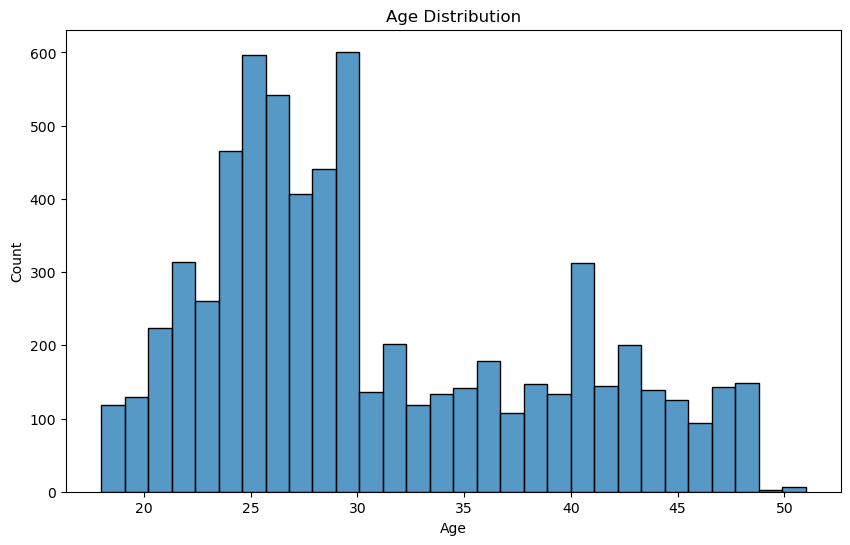

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_full, x='Age', bins=30)
plt.title('Age Distribution')
plt.show()



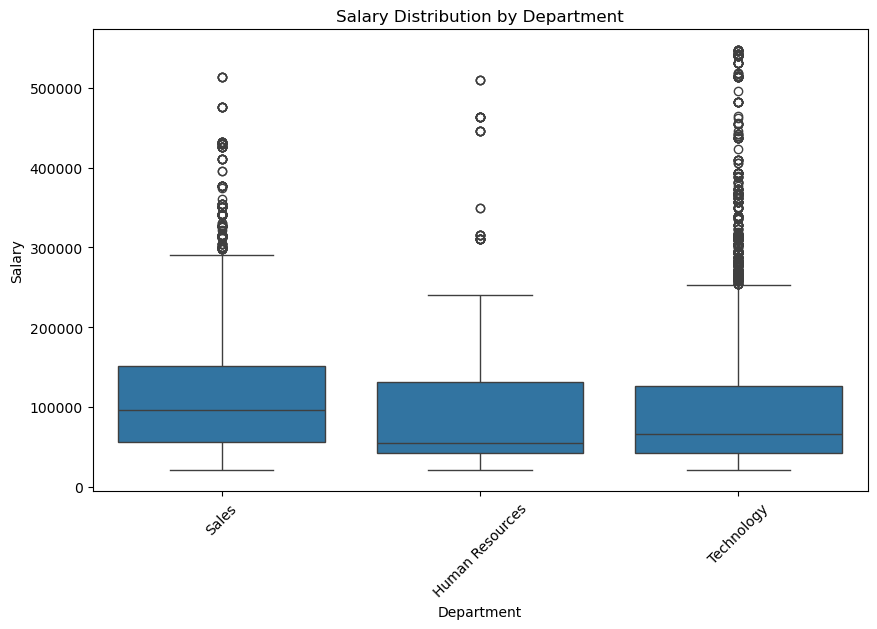

In [48]:
# 2. Salary by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_full, x='Department', y='Salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Department')
plt.show()


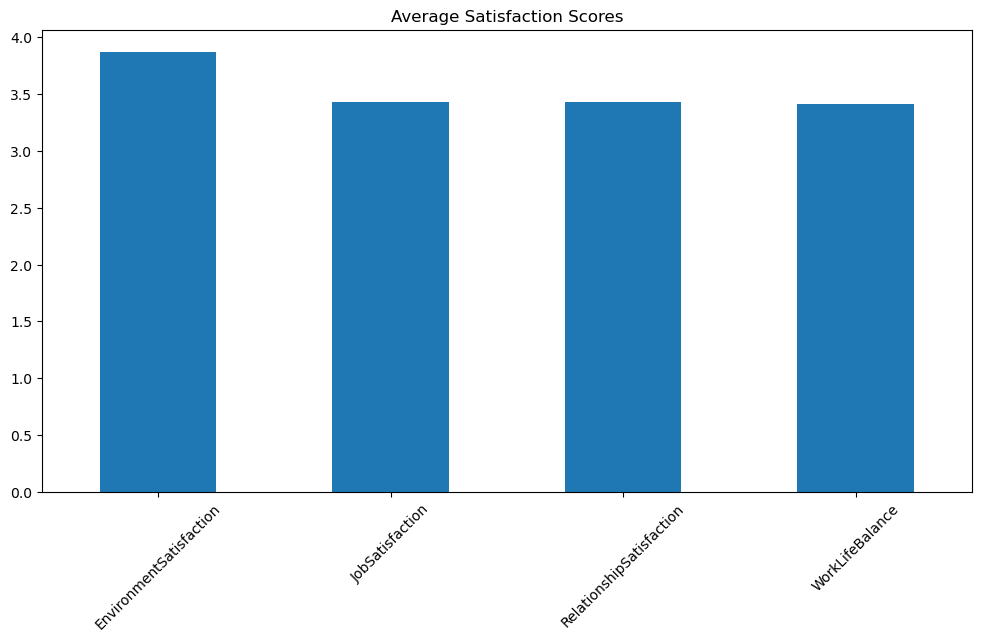

In [50]:
# 3. Performance Metrics
plt.figure(figsize=(12, 6))
performance_metrics = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
employee_full[performance_metrics].mean().plot(kind='bar')
plt.title('Average Satisfaction Scores')
plt.xticks(rotation=45)
plt.show()



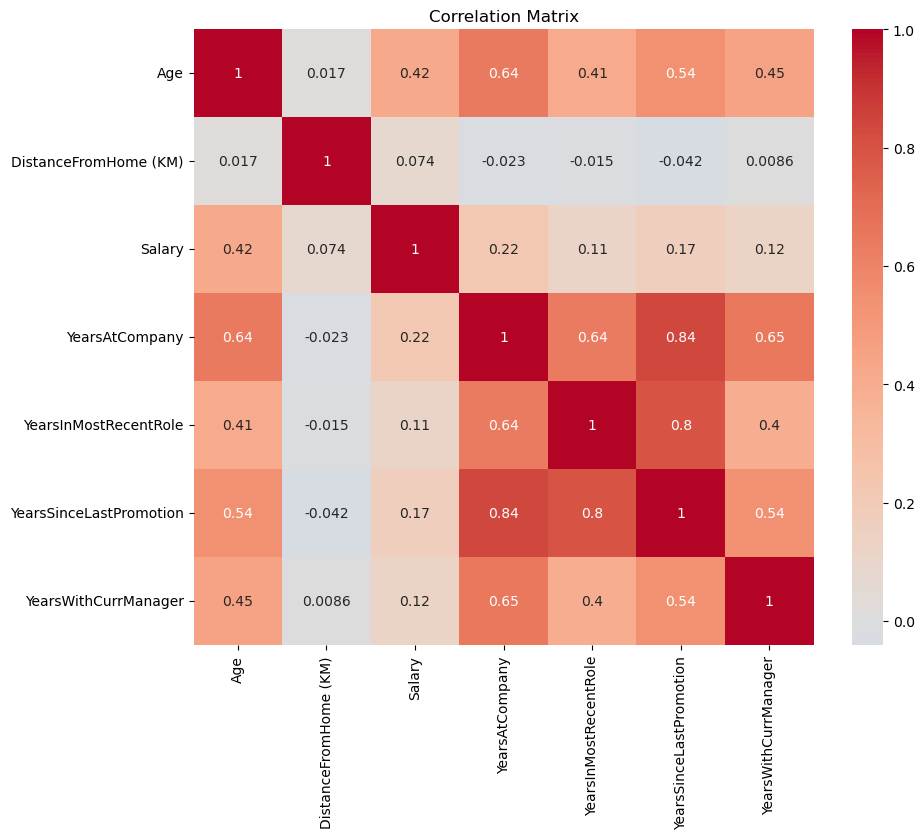

In [52]:
# 4. Correlation Matrix of Numerical Variables
numerical_cols = ['Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany', 
                 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
correlation_matrix = employee_full[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()



In [54]:
# 5. Key Statistics
print("\
Key Statistics:")
print("\
Department Distribution:")
print(employee_full['Department'].value_counts(normalize=True) * 100)

print("\
Average Salary by Education Level:")
print(employee_full.groupby('EducationLevel')['Salary'].mean().sort_values(ascending=False))

print("\
Overtime Distribution:")
print(employee_full['OverTime'].value_counts(normalize=True) * 100)

Key Statistics:
Department Distribution:
Department
Technology         63.452079
Sales              32.031599
Human Resources     4.516321
Name: proportion, dtype: float64
Average Salary by Education Level:
EducationLevel
Doctorate                   160410.118483
Bachelors                   116249.856872
Masters                     112680.091452
High School                 102950.836417
No Formal Qualifications     92219.328571
Name: Salary, dtype: float64
Overtime Distribution:
OverTime
No     66.65673
Yes    33.34327
Name: proportion, dtype: float64


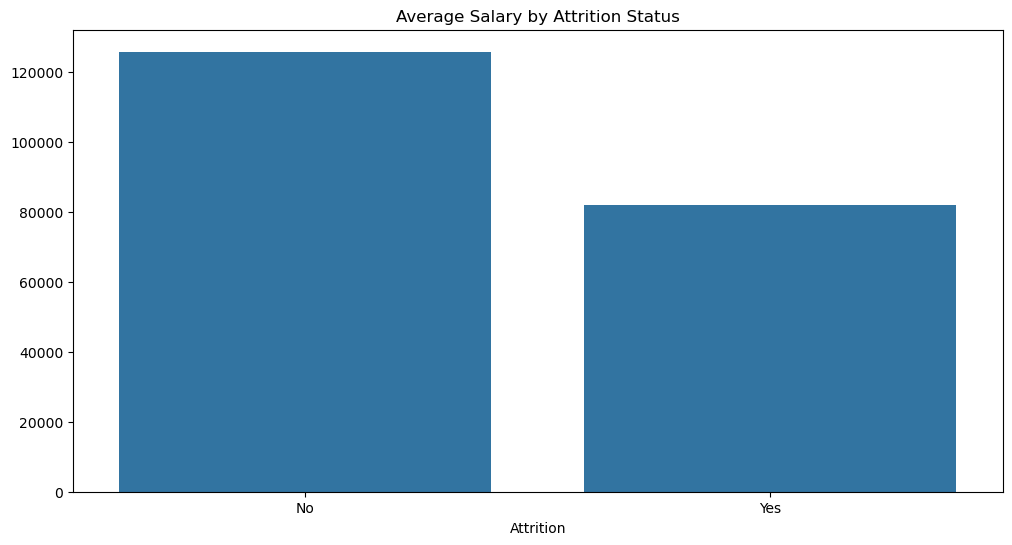

In [56]:
# Attrition factors
plt.figure(figsize=(12, 6))
attrition_by_salary = employee_full.groupby('Attrition')['Salary'].mean()
sns.barplot(x=attrition_by_salary.index, y=attrition_by_salary.values)
plt.title('Average Salary by Attrition Status')
plt.show()

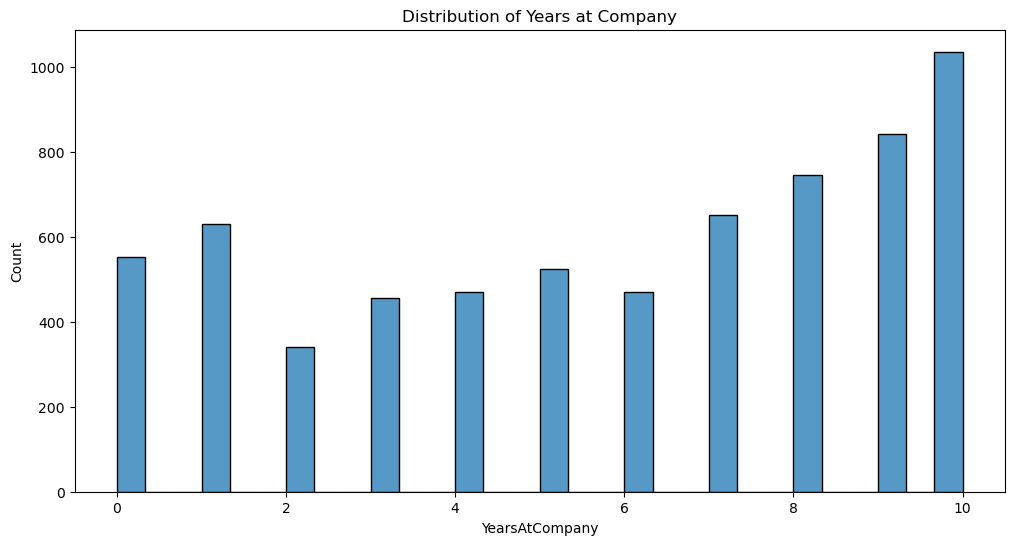

In [58]:
# Years at company distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=employee_full, x='YearsAtCompany', bins=30)
plt.title('Distribution of Years at Company')
plt.show()

<Figure size 1000x600 with 0 Axes>

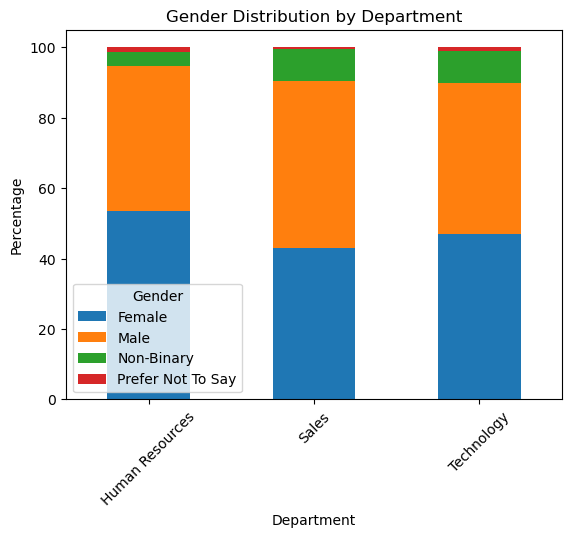

In [60]:
# Gender distribution across departments
plt.figure(figsize=(10, 6))
gender_dept = pd.crosstab(employee_full['Department'], employee_full['Gender'], normalize='index') * 100
gender_dept.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


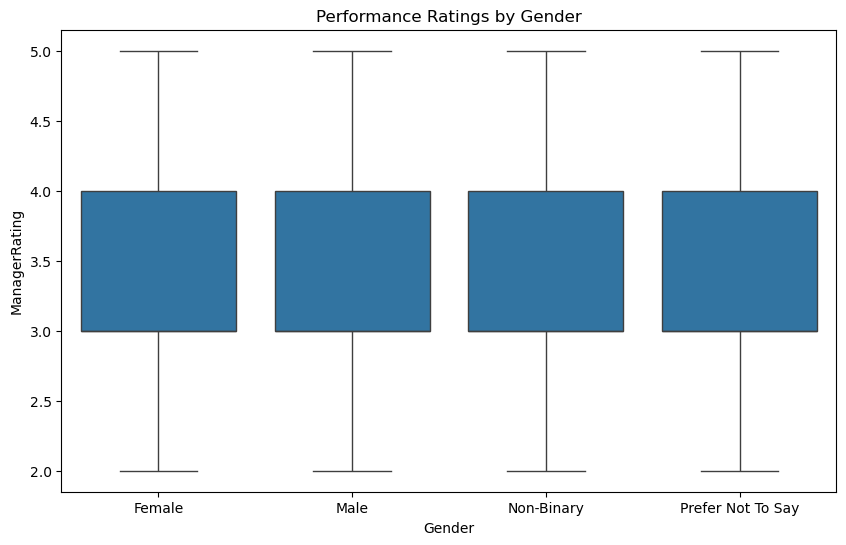

In [62]:

# Performance ratings by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_full, x='Gender', y='ManagerRating')
plt.title('Performance Ratings by Gender')
plt.show()

<Figure size 1500x1000 with 0 Axes>

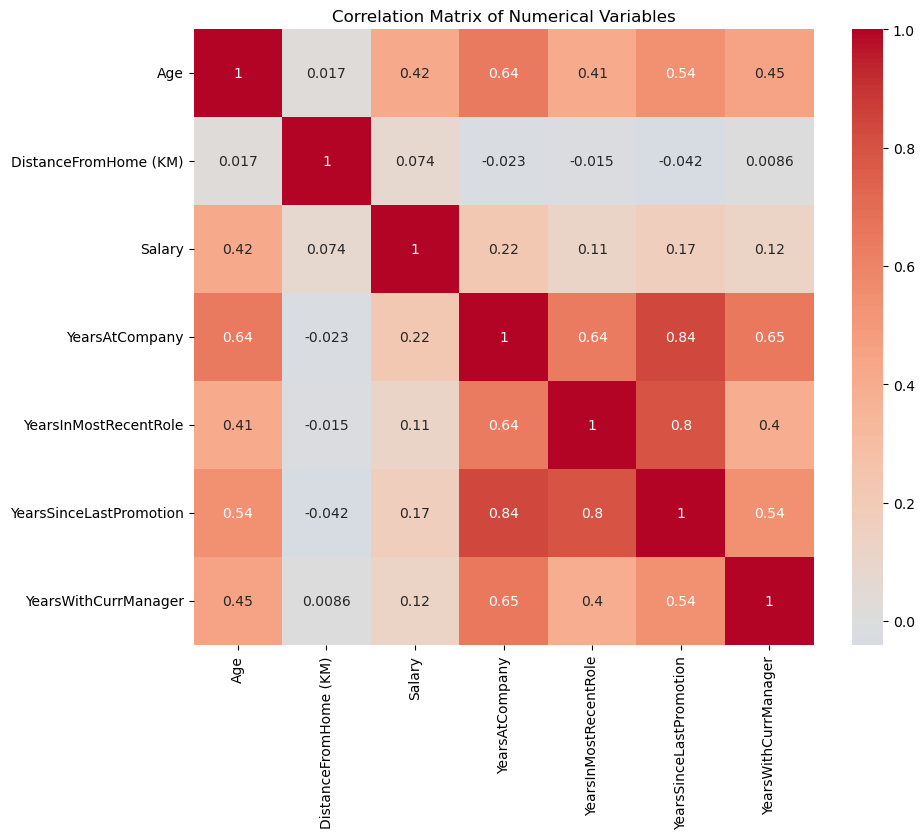

In [100]:
# Create comprehensive EDA visualizations
fig = plt.figure(figsize=(15, 10))

# Create correlation heatmap for numerical variables
numerical_cols = ['Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany', 
                 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
correlation_matrix = employee_full[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



Text(0.5, 1.0, 'Salary Distribution')

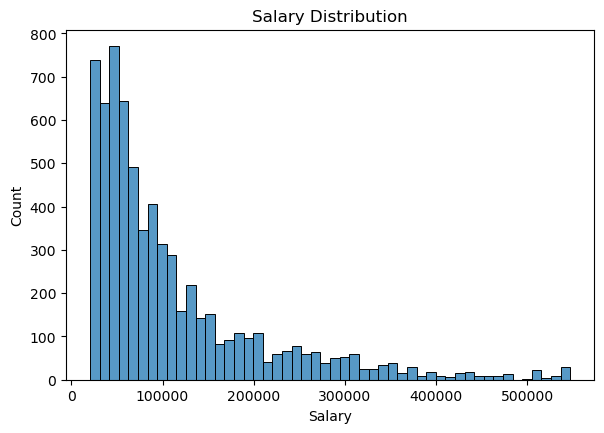

In [84]:
fig = plt.figure(figsize=(15, 10))

# 1. Salary Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=employee_full, x='Salary', bins=50)
plt.title('Salary Distribution')

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Technology')])

<Figure size 1500x1000 with 0 Axes>

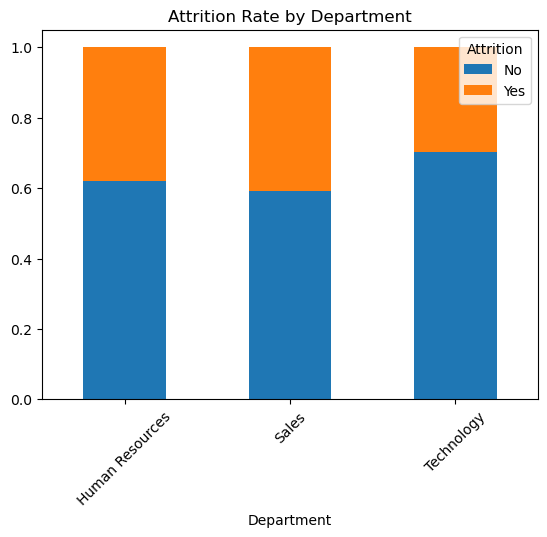

In [92]:
fig = plt.figure(figsize=(15, 10))
# 2. Attrition by Department
attrition_dept = employee_full.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
attrition_dept.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Department')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Age vs Salary by Department')

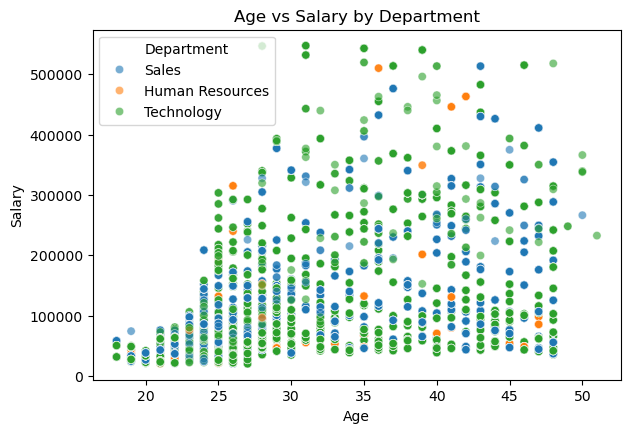

In [94]:
fig = plt.figure(figsize=(15, 10))

# 3. Age vs Salary with Department
plt.subplot(2, 2, 3)
sns.scatterplot(data=employee_full, x='Age', y='Salary', hue='Department', alpha=0.6)
plt.title('Age vs Salary by Department')

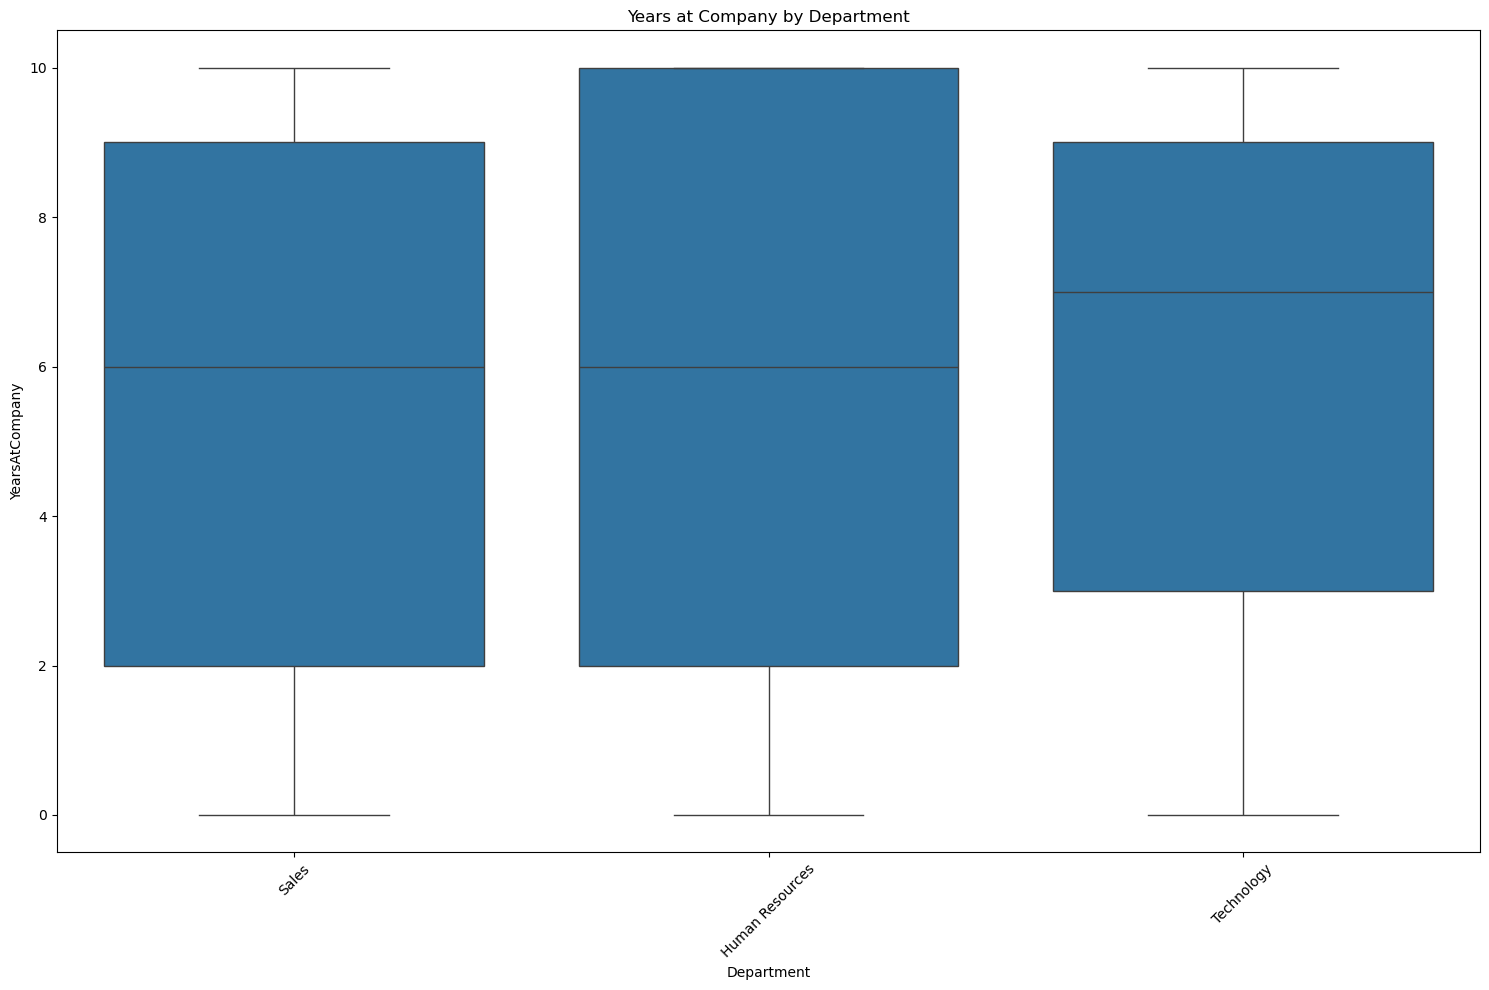

In [98]:
# 4. Years at Company Distribution
fig = plt.figure(figsize=(15, 10))
sns.boxplot(data=employee_full, x='Department', y='YearsAtCompany')
plt.title('Years at Company by Department')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [102]:
# Merge Employee with PerformanceRating
employee_performance = pd.merge(employee, performance_rating, on='EmployeeID', how='inner')
pd.set_option('display.width', 1000)  # Expand display width
pd.set_option('display.max_columns', None)  # Show all columns

employee_performance
# Merge the result with EducationLevel
employee_full = pd.merge(employee_performance, education_level, left_on='Education',right_on='EducationLevelID' ,how='inner')
employee_full
# # Display the first few rows of the merged dataset
# print("Merged Employee Data:")
# employee_full

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1295,10/30/2016,3,3,2,3,0,4,3,3,5,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1908,10/30/2017,4,4,5,3,1,2,3,2,5,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR2617,10/30/2018,5,5,4,3,0,4,5,5,5,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR3436,10/30/2019,1,3,2,3,1,3,5,4,5,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR411,10/31/2014,3,4,2,1,0,3,4,3,5,Doctorate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR355,6/5/2014,5,2,3,1,0,3,3,2,2,High School
6705,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR4032,6/3/2020,5,3,2,3,1,4,3,3,2,High School
6706,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR5034,6/3/2021,3,3,3,2,3,3,5,5,2,High School
6707,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR6120,6/3/2022,5,3,5,2,1,3,3,3,2,High School


In [104]:
employee_full

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1295,10/30/2016,3,3,2,3,0,4,3,3,5,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1908,10/30/2017,4,4,5,3,1,2,3,2,5,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR2617,10/30/2018,5,5,4,3,0,4,5,5,5,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR3436,10/30/2019,1,3,2,3,1,3,5,4,5,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR411,10/31/2014,3,4,2,1,0,3,4,3,5,Doctorate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR355,6/5/2014,5,2,3,1,0,3,3,2,2,High School
6705,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR4032,6/3/2020,5,3,2,3,1,4,3,3,2,High School
6706,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR5034,6/3/2021,3,3,3,2,3,3,5,5,2,High School
6707,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,2,Marketing,Sales Representative,Married,38532,3,Yes,2022-12-03,Yes,0,0,0,0,PR6120,6/3/2022,5,3,5,2,1,3,3,3,2,High School


In [52]:
employee_full=employee_full.drop([], axis=1)


In [106]:
satisfaction_mapping = {
    1: "Very Dissatisfied",
    2: "Dissatisfied",
    3: "Neutral",
    4: "Satisfied",
    5: "Very Satisfied"
}

work_life_balance_mapping = {
    1: "Poor",
    2: "Fair",
    3: "Good",
    4: "Very Good",
    5: "Excellent"
}

rating_mapping = {
    1: "Low",
    2: "Below Average",
    3: "Average",
    4: "Above Average",
    5: "High"
}


In [108]:
satisfaction_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction"]
rating_columns = ["SelfRating", "ManagerRating"]
work_life_balance_column = ["WorkLifeBalance"]

# Apply mappings
employee_full[satisfaction_columns] = employee_full[satisfaction_columns].apply(lambda x: x.map(satisfaction_mapping))
employee_full[work_life_balance_column] = employee_full[work_life_balance_column].apply(lambda x: x.map(work_life_balance_mapping))
employee_full[rating_columns] = employee_full[rating_columns].apply(lambda x: x.map(rating_mapping))


In [119]:
employee_full

,EmployeeID,FirstName,LastName,Gender,Age,Department,DistanceFromHome (KM),State,Ethnicity,EducationField,JobRole,MaritalStatus,Salary,OverTime,HireDate,Attrition,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Sales,27,IL,White,Marketing,Sales Executive,Divorced,102059,No,2012-01-03,No,10,9,7,Neutral,Neutral,Dissatisfied,3,0,Very Good,Average,Average,5,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Sales,27,IL,White,Marketing,Sales Executive,Divorced,102059,No,2012-01-03,No,10,9,7,Satisfied,Satisfied,Very Satisfied,3,1,Fair,Average,Below Average,5,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Sales,27,IL,White,Marketing,Sales Executive,Divorced,102059,No,2012-01-03,No,10,9,7,Very Satisfied,Very Satisfied,Satisfied,3,0,Very Good,High,High,5,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Sales,27,IL,White,Marketing,Sales Executive,Divorced,102059,No,2012-01-03,No,10,9,7,Very Dissatisfied,Neutral,Dissatisfied,3,1,Good,High,Above Average,5,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Sales,27,IL,White,Marketing,Sales Executive,Divorced,102059,No,2012-01-03,No,10,9,7,Neutral,Satisfied,Dissatisfied,1,0,Good,Above Average,Average,5,Doctorate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,06E8-4FD4,Emilee,Wenham,Female,20,Sales,32,CA,Black or African American,Marketing,Sales Representative,Married,38532,Yes,2022-12-03,Yes,0,0,0,Very Satisfied,Dissatisfied,Neutral,1,0,Good,Average,Below Average,2,High School
6705,06E8-4FD4,Emilee,Wenham,Female,20,Sales,32,CA,Black or African American,Marketing,Sales Representative,Married,38532,Yes,2022-12-03,Yes,0,0,0,Very Satisfied,Neutral,Dissatisfied,3,1,Very Good,Average,Average,2,High School
6706,06E8-4FD4,Emilee,Wenham,Female,20,Sales,32,CA,Black or African American,Marketing,Sales Representative,Married,38532,Yes,2022-12-03,Yes,0,0,0,Neutral,Neutral,Neutral,2,3,Good,High,High,2,High School
6707,06E8-4FD4,Emilee,Wenham,Female,20,Sales,32,CA,Black or African American,Marketing,Sales Representative,Married,38532,Yes,2022-12-03,Yes,0,0,0,Very Satisfied,Neutral,Very Satisfied,2,1,Good,Average,Average,2,High School


In [112]:
employee_full.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
DistanceFromHome (KM)              0
State                              0
Ethnicity                          0
Education                          0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
StockOptionLevel                   0
OverTime                           0
HireDate                           0
Attrition                          0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
R

In [115]:
employee_full=employee_full.drop(['StockOptionLevel','Education', 'ReviewDate', 'YearsInMostRecentRole','BusinessTravel','PerformanceID'],axis=1)


In [123]:
employee_full=employee_full.drop(['EducationLevelID'],axis=1)


In [127]:
employee_full.to_csv('employees_info.csv', index=False)